## Homework 01-intro

## Q1. Pandas version

In [3]:
import pandas as pd

In [4]:
pd.__version__


'2.0.3'

## Getting the data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


## Q2. Records count
How many records are in the dataset?



In [6]:
len(df)

9704

## Q3. Fuel types
How many fuel types are presented in the dataset?



In [7]:
len(df.fuel_type.unique())

2

## Q4. Missing values
How many columns in the dataset have missing values?

In [ ]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


Checking visually where we have missing values:

In [40]:
df.isnull().any(axis=0,skipna=False)

engine_displacement    False
num_cylinders           True
horsepower              True
vehicle_weight         False
acceleration            True
model_year             False
origin                 False
fuel_type              False
drivetrain             False
num_doors               True
fuel_efficiency_mpg    False
dtype: bool

Counting columns(True) with missing valus:

In [39]:
df.isnull().any(axis=0,skipna=False).sum()

4

The other way to do it, is by comparing total non-null values with total row count:

In [45]:
(df.count()<len(df)).sum()

4

## Q5. Max fuel 
What's the maximum fuel efficiency of cars from Asia?

In [46]:
df[df['origin']=='Asia'].fuel_efficiency_mpg.max()

23.759122836520497

## Q6. Median value of horsepower
Find the median value of the horsepower column in the dataset.

In [107]:
df.horsepower.median()

149.0

<Axes: >

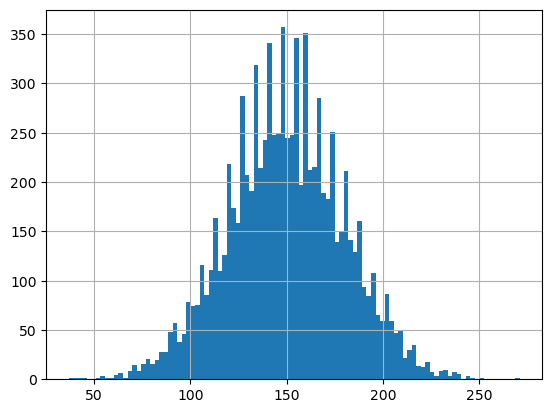

In [118]:
df.horsepower.hist(bins=100)

Next, calculate the most frequent value of the same horsepower column.

this will count nonnull values:

In [54]:
df['horsepower'].value_counts()

horsepower
152.0    142
145.0    141
151.0    134
148.0    130
141.0    130
        ... 
46.0       1
43.0       1
53.0       1
66.0       1
61.0       1
Name: count, Length: 192, dtype: int64

In [101]:
df['horsepower'].value_counts().idxmax()

152.0

the other more academic, more straight or more right way is to use mode():

In [106]:
df.horsepower.mode()[0]

152.0

the third method is to use groupby size() of values:

this will give up max count of values grouped by value :)

In [59]:
df.groupby('horsepower').size().max()

142

and this will give up the value itself using the index of the max count of values series:

In [62]:
df.groupby('horsepower').size().idxmax()

152.0

Use the fillna method to fill the missing values in the horsepower column with the most frequent value from the previous step.
Now, calculate the median value of horsepower once again.

In [ ]:
df.horsepower.fillna(152).median()

152.0

In [112]:
df.horsepower.fillna(152).mean()

149.82821516900248

lets check the actual values:

In [108]:
df['horsepower'].fillna(152).value_counts()

horsepower
152.0    850
145.0    141
151.0    134
141.0    130
148.0    130
        ... 
46.0       1
43.0       1
53.0       1
66.0       1
61.0       1
Name: count, Length: 192, dtype: int64

<Axes: >

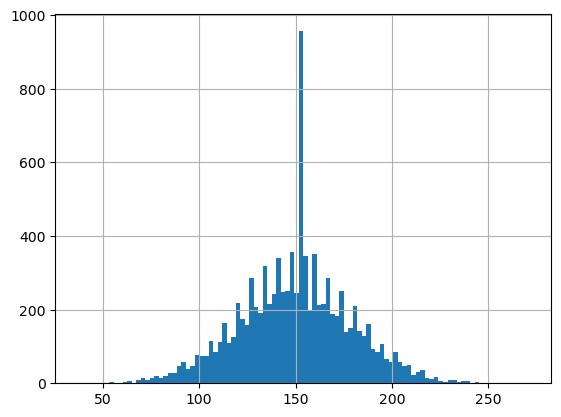

In [111]:
df['horsepower'].fillna(152).hist(bins=100)

and yea indeed 152 is the most frequent value now:

In [105]:
df.horsepower.fillna(152).mode()[0]

152.0

so effectively median became eqal to mode

## Q7. Sum of weights

Select all the cars from Asia.

Select only columns vehicle_weight and model_year.

Select the first 7 values

In [82]:
dfw = df[['vehicle_weight', 'model_year']][df.origin=='Asia'][:7]
dfw

,vehicle_weight,model_year
8,2714.219310,2016
12,2783.868974,2010
14,3582.687368,2007
20,2231.808142,2011
21,2659.431451,2016
34,2844.227534,2014
38,3761.994038,2019


Get the underlying NumPy array. Let's call it X.

In [84]:
X = dfw.to_numpy()
X

array([[2714.21930965, 2016.        ],
       [2783.86897424, 2010.        ],
       [3582.68736772, 2007.        ],
       [2231.8081416 , 2011.        ],
       [2659.43145076, 2016.        ],
       [2844.22753389, 2014.        ],
       [3761.99403819, 2019.        ]])

Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.

In [86]:
XTX = X.T @ X
XTX

array([[62248334.33150762, 41431216.5073268 ],
       [41431216.5073268 , 28373339.        ]])

Invert XTX.

In [92]:
import numpy as np
iXTX = np.linalg.inv(XTX)
iXTX

array([[ 5.71497081e-07, -8.34509443e-07],
       [-8.34509443e-07,  1.25380877e-06]])

Create an array y with values [1100, 1300, 800, 900, 1000, 1100, 1200].

In [94]:
y = np.array([1100, 1300, 800, 900, 1000, 1100, 1200])
y

array([1100, 1300,  800,  900, 1000, 1100, 1200])

Multiply the inverse of XTX with the transpose of X, 
and then multiply the result by y.
 Call the result w.

In [95]:
w = (iXTX @ X.T) @ y
w

array([0.01386421, 0.5049067 ])

What's the sum of all the elements of the result?

In [96]:
w.sum()

0.5187709081074007